In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data = sns.load_dataset('mpg')
print(data.columns.dtype)
print(data.shape)

object
(398, 9)


In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
print(list(data.cylinders.unique()))

[8, 4, 6, 3, 5]


In [8]:
print(list(data.model_year.unique()))

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


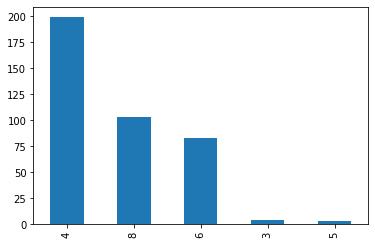

In [9]:
data.cylinders.value_counts().plot(kind = 'bar')

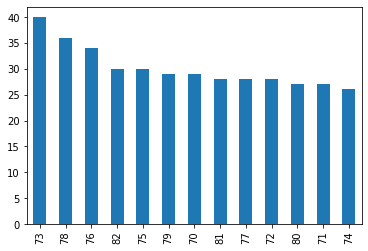

In [10]:
data.model_year.value_counts().plot(kind = 'bar')

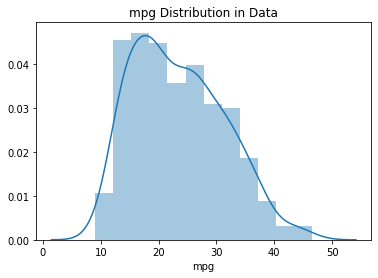

In [11]:
sns.distplot(data['mpg']);
plt.title('mpg Distribution in Data')
plt.show()

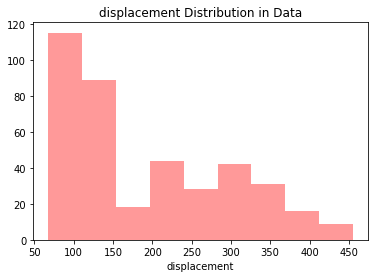

In [12]:
sns.distplot(data['displacement'], hist=True, kde=False, color='red')
plt.title('displacement Distribution in Data')
plt.show()

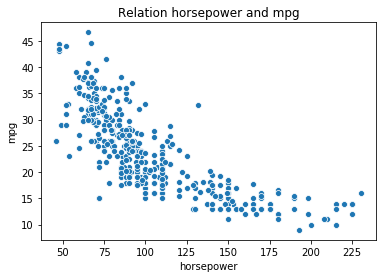

In [13]:
sns.scatterplot(x='horsepower', y='mpg', data=data);
plt.title('Relation horsepower and mpg')
plt.show()

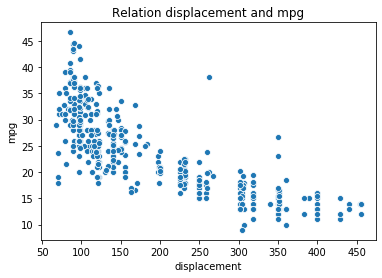

In [14]:
sns.scatterplot(x='displacement', y='mpg', data=data);
plt.title('Relation displacement and mpg')
plt.show()

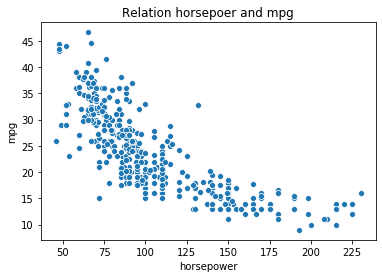

In [15]:
sns.scatterplot(x='horsepower', y='mpg', data=data);
plt.title('Relation horsepoer and mpg')
plt.show()

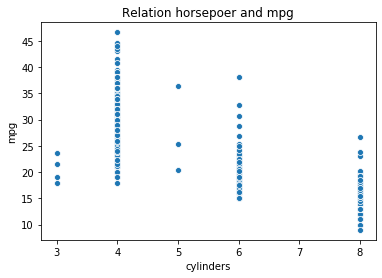

In [16]:
sns.scatterplot(x='cylinders', y='mpg', data=data);
plt.title('Relation horsepoer and mpg')
plt.show()

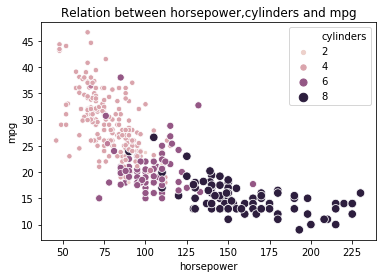

In [17]:
sns.scatterplot(x='horsepower', y='mpg',size='cylinders', hue='cylinders', data=data)
plt.title('Relation between horsepower,cylinders and mpg')
plt.show()

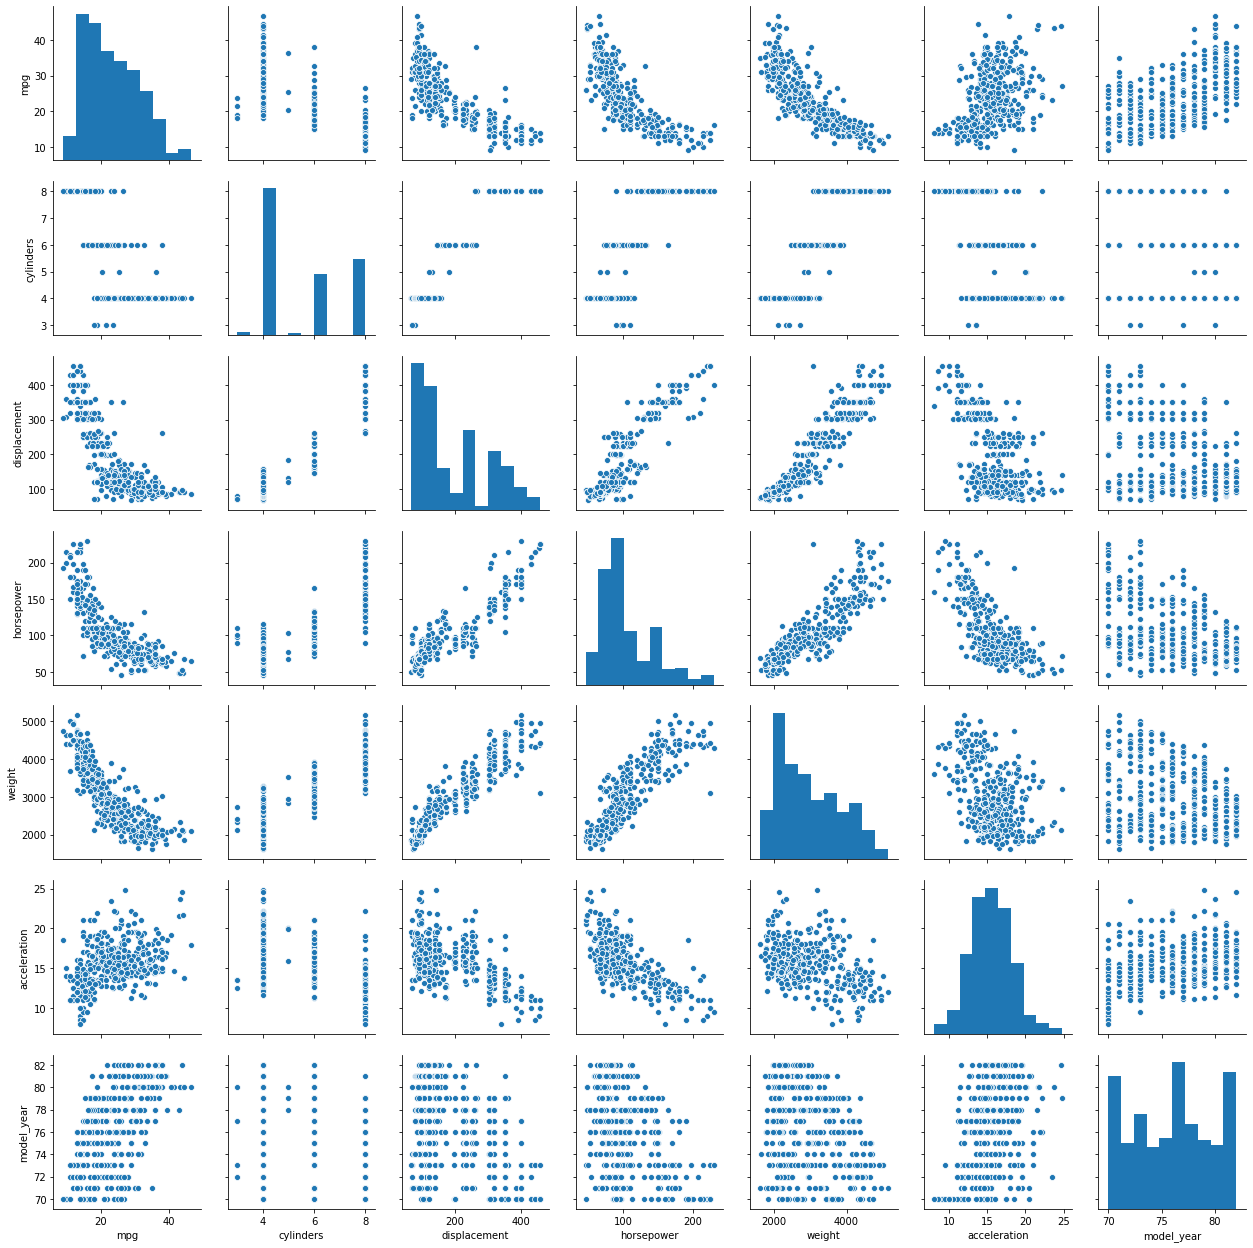

In [18]:
sns.pairplot(data)

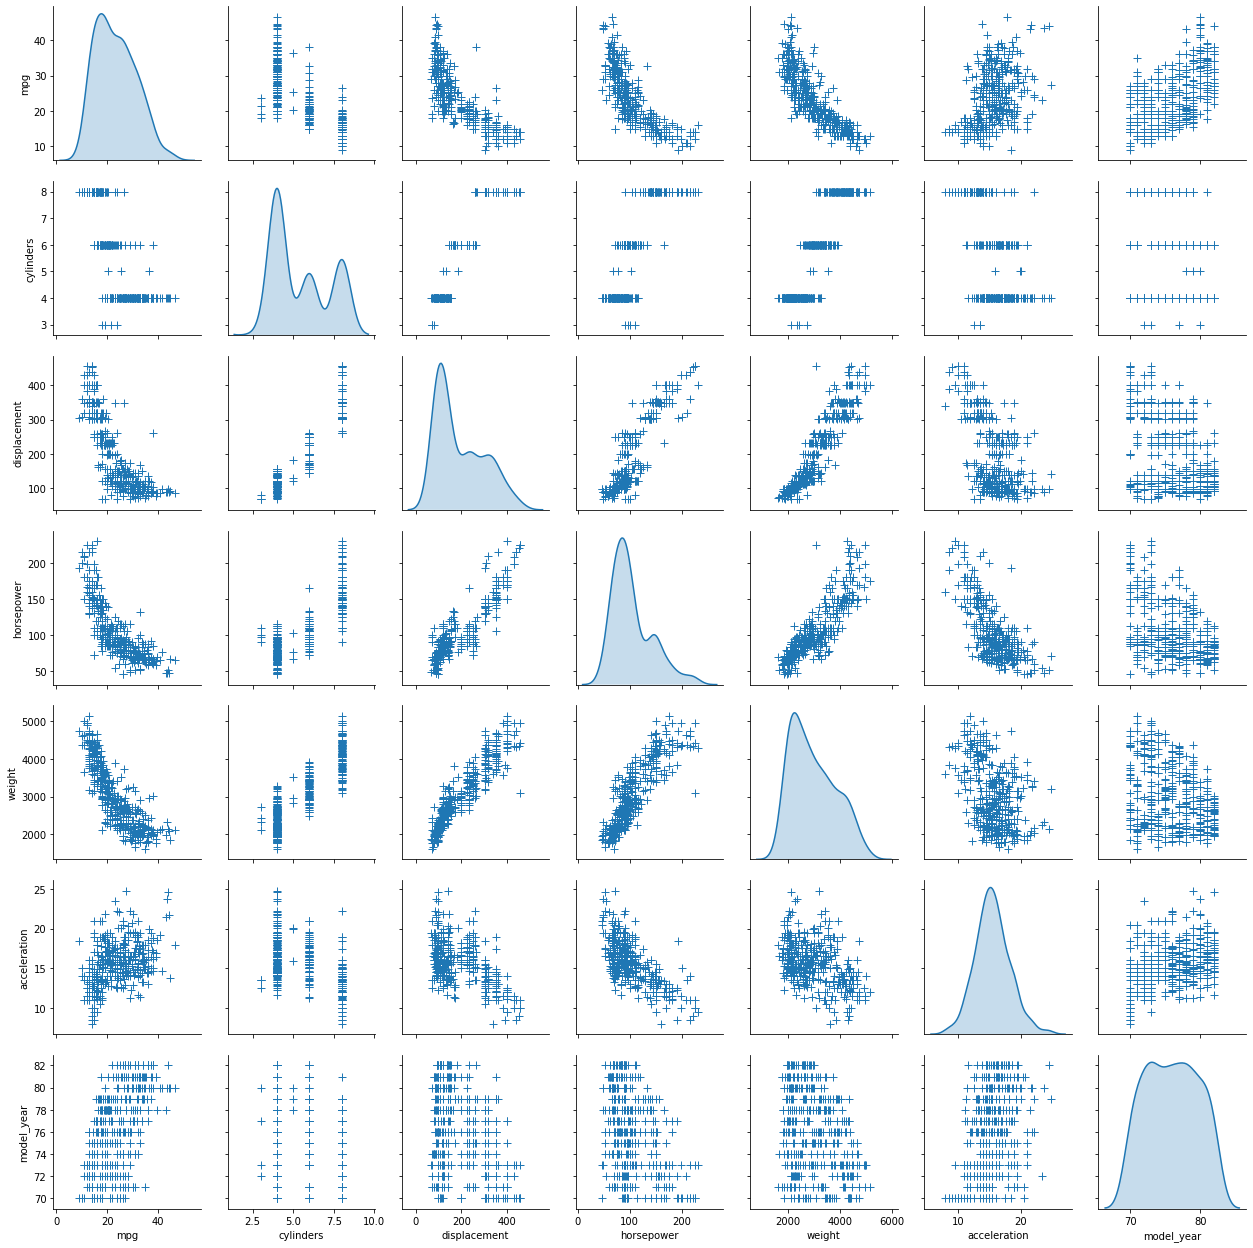

In [19]:
sns.pairplot(data, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))

In [21]:
data = data.drop(['name','origin','model_year'], axis=1)
X = data.drop('mpg', axis=1)
y = data[['mpg']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_predicted = reg.predict(X_test[['horsepower']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 28.66
R²: 0.59


In [26]:
reg = LinearRegression()
reg.fit(X_train[['horsepower','weight','cylinders']], y_train)
y_predicted = reg.predict(X_test[['horsepower','weight','cylinders']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 19.12
R²: 0.72


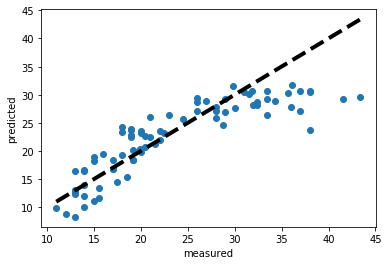

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [28]:
reg = LinearRegression()
reg.fit(X_train[['acceleration','horsepower','displacement']], y_train)
y_predicted = reg.predict(X_test[['acceleration','horsepower','displacement']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 23.56
R²: 0.66


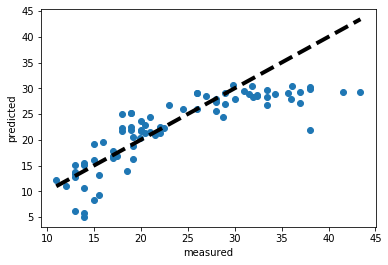

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [30]:
reg = LinearRegression()
reg.fit(X_train[['horsepower','weight','displacement']], y_train)
y_predicted = reg.predict(X_test[['horsepower','weight','displacement']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 19.54
R²: 0.72


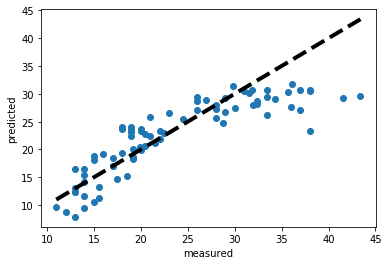

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()